# Pendulum example

- a simple pendulum (a mass on a string) can be used to measure the gravitational acceleration g
- such a measurement was performed by students in a lab class and the results were recorded and stored in a CSV (comma separated values) file
- the measurements are a mix of "first pendulum" (large uncertainty) and "best pendulum" (smaller uncertainty) measurements

- __First step: Let's look at the raw data__

In [1]:
# open the text file containing data

f = open("../Data/pendulumData.csv","r")

# Use a while loop to read the data line-by-line until the end of file
flag = True
i = 0
while flag:
    s = f.readline()
    if s:
        print(i,s)
        i = i + 1
    else:
        # reached end of file; stop while loop
        flag = False
        
# close the data file
f.close()


0 label,g (m/s2),stat uncert,sys uncert,total uncert

1 20.Sep.X.B01.01,9.83,0.0075,"""+0.35,-0.44""",

2 20.Sep.X.B01.02,9.06,0.14,0.23,

3 20.Sep.X.B01.03,9.79,0.02,0.02,

4 20.Sep.X.B01.04,9.882,0.016,0.13,

5 20.Sep.X.B01.05,978,17,8,

6 20.Sep.X.B02.01,9.807,0.001,0.008,

7 20.Sep.X.B02.02,9.28,,,0.47

8 20.Sep.X.B02.03,9.811,,,0.02

9 20.Sep.X.B02.04,9.26,0.1,0.07,

10 20.Sep.X.B03.01,9.8095,0.0035,0.0072,

11 20.Sep.X.B03.02,9.68,,,0.45

12 20.Sep.X.B03.03,9.795,0.005,0.001,

13 20.Sep.X.B03.04,9.62,,,0.02

14 20.Sep.X.B03.05,9.779,,,0.01

15 20.Sep.X.B04.01,10.63,0.04,0.08,

16 20.Sep.X.B04.03,9.565,0.2,0.2532,

17 20.Sep.X.B04.04,9.857,,,0.204

18 20.Sep.X.NRx.01,9.56,,,0.03

19 20.Sep.X.NRx.02,9.815,,,0.007

20 20.Sep.X.NRx.03,9.8079,,,0.0077

21 21.Feb.X.B01.01,9.8,0.005,0.031,

22 21.Feb.X.B01.02,9.76,0.01,0.19,

23 21.Feb.X.B01.03,9.75,0.247,0.022,

24 21.Feb.X.B02.01,9.8608,,,0.15076

25 21.Feb.X.B02.02,9.8078,0.0005,0.0049,

26 21.Feb.X.B02.03,9.685,0.089,0.178,

27 21.F

__Second step: Read in the raw data, make a histogram, plot the data and examine it__

# of measurements read is 353
Gaussian parameters: [978.0, 12.571020397617563, 51.46230796912768]
<g> =  12.571020397617563 std(g) =  51.46230796912768
uncertainty sigma/sqrt(N) on <g> = 2.7390622769937636


Text(0, 0.5, '#of measurements per bin')

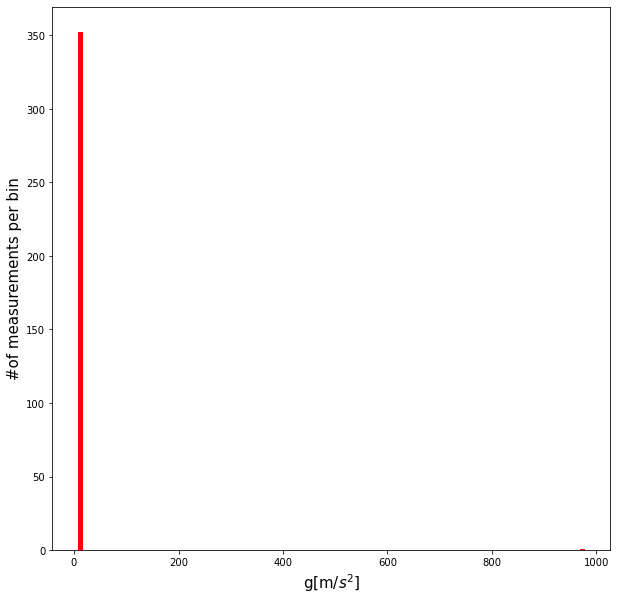

In [2]:
#### import numpy as np
import matplotlib.pylab as plt
import numpy as np

# open a text file containing data

f = open("../Data/pendulumData.csv","r")

#read one line of data and discard header line

s = f.readline()

# define empty array to store data values
g = []

#the while loop will run until the end of file or i == nevent
flag = True
i = 0
while flag:
    s = f.readline()
    if s:
#        print(i,s)
        ss = s.split(",")
        g.append(float(ss[1]))
        i = i + 1
    else:
        # reached end of file; stop while loop
        flag = False
        
print("# of measurements read is",i)
f.close()

#plt.subplot(110)


nbins = 100

plt.figure(figsize=(10,10))
counts, edges, something  = plt.hist(g,nbins, color = 'r')

g_max = np.amax(g)
g_ave = np.average(g)
g_std = np.std(g)
g_uncertainty = g_std/np.sqrt(i)

par = [g_max,g_ave,g_std]
g_max = np.amax(counts)
g_ave = np.average(g)
g_std = np.std(g)
g_uncertainty = g_std/np.sqrt(i)
print("Gaussian parameters:",par)
print("<g> = ",g_ave,"std(g) = ",g_std)
print("uncertainty sigma/sqrt(N) on <g> =",g_uncertainty)

plt.xlabel(r'g[m/$s^2$]', fontsize = 15)
plt.ylabel(r'#of measurements per bin', fontsize = 15)


- most of the data are close to 10m/s^2, but one data point is at 980 m/s^2
- data points like this are called outliers
- what to do with data like this?
- Do not just throw them away, but think how this might have happened
- is there an explanation? Was this a mistake or is this a big discovery?
- in this case, it is __likely__ that someone reported the result in cm/s^2 instead of m/s^2, making a factor of 100 difference
- let's do this again, but clean up the data before plotting

# of measurements read is 353


Text(0, 0.5, '#of measurements per bin')

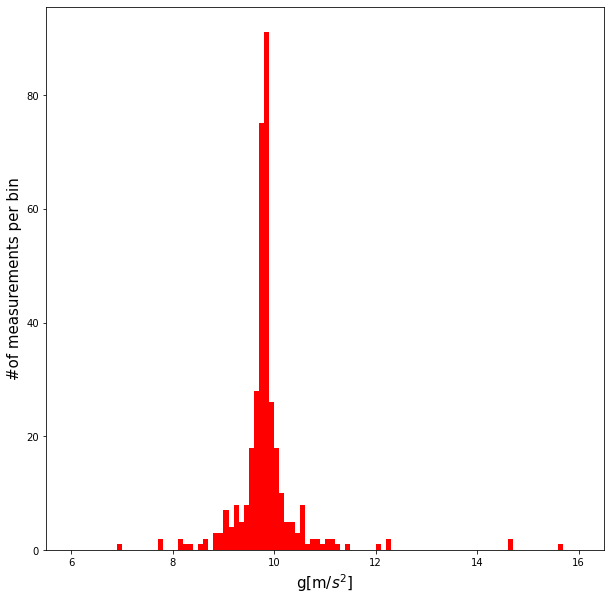

In [3]:
#### import numpy as np
import matplotlib.pylab as plt
import numpy as np

# example of function definition
def gauss(x, a, x0, sigma):
   return a*np.exp(-(x-x0)**2/(2*(sigma**2)))

# open a text file containing data

f = open("../Data/pendulumData.csv","r")

#read one line of data and discard

s = f.readline()

# define empty array to store data values
g = []


#the while loop will run until the end of file or i == nevent
flag = True
i = 0
while flag:
    s = f.readline()
    if s:
#        print(i,s)
        ss = s.split(",")
        x = float(ss[1])
        if(x > 500.0):
            x = x/100.0
        g.append(x)
        i = i + 1
    else:
        # reached end of file; stop while loop
        flag = False
        
print("# of measurements read is",i)
f.close()

nbins = 100

#range of histogram
xmin = 6
xmax = 16

plt.figure(figsize=(10,10))
counts, edges, something  = plt.hist(g,nbins, color = 'r',range = [xmin,xmax])


plt.xlabel(r'g[m/$s^2$]', fontsize = 15)
plt.ylabel(r'#of measurements per bin', fontsize = 15)


- Ok, that looks better
- now we can look at the important statistical properties of the distribution

In [4]:
g_max = np.amax(g)
g_ave = np.average(g)
g_std = np.std(g)
g_uncertainty = g_std/np.sqrt(i)

print("<g> = ",g_ave,"std(g) = ",g_std)
print("uncertainty sigma/sqrt(N) on <g> =",g_uncertainty)


<g> =  9.828187536427762 std(g) =  0.7007006988740625
uncertainty sigma/sqrt(N) on <g> = 0.0372945351168564


- we can do better by just plotting the __significant digits__
- out uncertainty is about 0.04. So digits much smaller than this are just noise with no information

In [5]:
print("Final result:")
print(f'<g> = {g_ave:.3f}',f'std(g) = {g_std:.3f}')
print(f'uncertainty sigma/sqrt(N) on <g> = {g_uncertainty:.3f}')

Final result:
<g> = 9.828 std(g) = 0.701
uncertainty sigma/sqrt(N) on <g> = 0.037


Gaussian parameters: [15.7, 9.828187536427762, 0.7007006988740625]
Chi^2 =  103.40825990464624 for  34 #DOF
Fitted parameters =  [57.91756336  9.80070434  0.17192142]
Uncertainties =  [8.68306867 0.01898444 0.01744176]


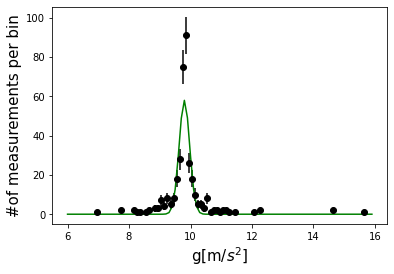

In [6]:
#Import the curve_fit function from scipy

from scipy.optimize import curve_fit

# Define a Gaussian function
def gauss(x, a, x0, sigma):
   return a*np.exp(-(x-x0)**2/(2*(sigma**2)))

# set starting values for the Gaussian fit
par = [g_max,g_ave,g_std]

g_uncertainty = g_std/np.sqrt(i)
print("Gaussian parameters:",par)

# calculate the uncertainty on each bin as sqrt(entries)
y_err = []
x_val = []
y_val = []
for i in range(len(counts)):
    e = np.sqrt(counts[i])
    if e > 0:
        y_err.append(e)
        x_val.append((edges[i]+edges[i+1])/2)
        y_val.append(counts[i])

plt.errorbar(x_val,y_val,yerr=y_err,fmt='ko')
plt.xlabel(r'g[m/$s^2$]', fontsize = 15)
plt.ylabel(r'#of measurements per bin', fontsize = 15)

#using the starting parameters, fit a Gaussian curve to the data
popt, pcov = curve_fit(gauss, x_val, y_val,p0 = par, sigma = y_err)

# get parameter errors as sqrt of diagonal of covariance matrix
perr = np.sqrt(np.diag(pcov))

# calculate the chi^2
chi2 = 0.0
for i in range(len(x_val)):
    x = (gauss(x_val[i],*popt) - y_val[i])/y_err[i]
    chi2 = chi2 + x*x
    
ndof = len(x_val) - len(par)

print("Chi^2 = ",chi2,"for ",ndof,"#DOF")
    
print("Fitted parameters = ",popt)
print("Uncertainties = ",perr)

# plot Gaussian with fitted parameters
xx = np.arange(xmin,xmax,0.1)
plt.plot(xx, gauss(xx, *popt),'g',label="Gaussian fit")